# 02. Preprocessing

## Setting

In [23]:
import pandas as pd 
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# rc('font', family='AppleGothic') # Mac 
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [24]:
data_path = "data/naver_review_raw_data.csv"
data = pd.read_csv(data_path)
data.head(5)

,reviewer,review,additional_info,date,n_visit,auth_method
0,shooooooo,종류도 알차게 많고 다 맛있어요!,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024년 6월 7일 금요일,1번째 방문,영수증
1,gudrmfl2,맛나요,"예약 후 이용, 대기 시간 10분 이내, 데이트, 연인·배우자",2024년 6월 7일 금요일,1번째 방문,영수증
2,코코리383,맛있어요,"예약 없이 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024년 5월 28일 화요일,1번째 방문,영수증
3,vivajin,좋아요,NaN,2024년 5월 25일 토요일,1번째 방문,영수증
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\r\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\r...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024년 5월 23일 목요일,1번째 방문,결제내역


In [25]:
# 데이터 중복 제거 
print(f"BEFORE: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"AFTER: {data.shape}")

BEFORE: (503, 6)
AFTER: (481, 6)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer         481 non-null    object
 1   review           481 non-null    object
 2   additional_info  57 non-null     object
 3   date             481 non-null    object
 4   n_visit          481 non-null    object
 5   auth_method      481 non-null    object
dtypes: object(6)
memory usage: 26.3+ KB


## 1. `additional_info`

* 많은 정보를 파악하기 위해 수집했으나, 그에 비해 결측치가 많은 것으로 나타남. 
* 그 개수가 10분의 1이 되지 않았기에 분석에서 제외함.

In [27]:
print(f"Missing Value: {data['additional_info'].isna().sum()}")

Missing Value: 424


## 2. `date`

* 날짜이기 때문에 datetime으로 변환
* 편의를 위해 날짜와 요일을 두 개의 열로 분리함

In [28]:
data["weekday"] = data["date"].str[-3:]
data["date"] = pd.to_datetime(data["date"].str[:-4], format="%Y년 %m월 %d일")

data.head(5)

,reviewer,review,additional_info,date,n_visit,auth_method,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요!,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-06-07,1번째 방문,영수증,금요일
1,gudrmfl2,맛나요,"예약 후 이용, 대기 시간 10분 이내, 데이트, 연인·배우자",2024-06-07,1번째 방문,영수증,금요일
2,코코리383,맛있어요,"예약 없이 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-05-28,1번째 방문,영수증,화요일
3,vivajin,좋아요,NaN,2024-05-25,1번째 방문,영수증,토요일
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\r\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\r...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024-05-23,1번째 방문,결제내역,목요일


## 3. `n_visit`

* 재방문 수이기 때문에 int로 변환
* 똑같은 날짜에 방문했는데도 `n_visit`만 다르고 내용이 똑같다는 것을 확인. 
* `n_visit` 변수를 지우고 중복 제거를 다시했다. 

In [29]:
data["n_visit"] = data["n_visit"].str[0].astype(int)
data["n_visit"].value_counts()

n_visit
1    455
2     23
5      1
4      1
3      1
Name: count, dtype: int64

In [30]:
revisitor_data = data["reviewer"].value_counts()
revisitor = revisitor_data[revisitor_data > 1].index
revisited_data = data.loc[data["reviewer"].isin(revisitor),:].sort_values(by=["reviewer","n_visit"])
print(revisited_data.shape)
revisited_data[["reviewer","review","date","n_visit"]]

(30, 7)


,reviewer,review,date,n_visit
124,AtoZer,고급진 셀렉션도 많고 뷔페로써 부족함 없는 구성 입니다 분위기나 서비스도 맘에 들었...,2023-03-05,1
56,AtoZer,신라호텔 더파크뷰♥️ 호텔 뷔페 중에서도 음식의 퀄리티와 맛이 단연 으뜸이라 할 수...,2023-11-10,2
310,ERANGMAM,"특별한날 방문하기 너무 좋아요\r\n음식도 항상 신선하고 맛있고,\r\n무엇보다 직...",2022-02-05,1
33,ERANGMAM,애기가 스테이크 너무 잘먹었어요\r\n언제나 더파크뷰는 흠이없어요 친절함과 식사의 ...,2024-01-03,2
235,TechnoMBA,맛있어요,2022-07-01,1
234,TechnoMBA,신라호텔 뷔페식당 더파크뷰입니다.\r\n남산자락에 위치한 호텔뷔페. 정말 맛있고 직...,2022-07-01,2
314,big****,긋,2022-02-04,1
313,big****,긋,2022-02-04,2
312,big****,긋,2022-02-04,3
311,big****,긋,2022-02-04,4


In [31]:
# 열 삭제 후 데이터 중복 제거
data = data.drop(columns=["n_visit"])
print(f"BEFORE: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"AFTER: {data.shape}")

BEFORE: (481, 6)
AFTER: (477, 6)


## 4. `auth_method`

* 대부분이 영수증이어서 분석에서 제외함

In [32]:
data["auth_method"].value_counts()

auth_method
영수증     467
예약        6
결제내역      4
Name: count, dtype: int64

## 5. `review`

### 1) 필요없는 문자 제거

In [33]:
# 필요없는 문자 제거
data["review"] = data["review"].str.replace(r"\r\n", " ", regex=True)
data["review"] = data["review"].str.replace(r"[^가-힣a-zA-Z0-9 ]", "", regex=True)
data.head(5)

,reviewer,review,additional_info,date,auth_method,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-06-07,영수증,금요일
1,gudrmfl2,맛나요,"예약 후 이용, 대기 시간 10분 이내, 데이트, 연인·배우자",2024-06-07,영수증,금요일
2,코코리383,맛있어요,"예약 없이 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-05-28,영수증,화요일
3,vivajin,좋아요,NaN,2024-05-25,영수증,토요일
4,쥴리08,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024-05-23,결제내역,목요일


In [34]:
# 리뷰가 없는 데이터 결측 처리
data["review"] = data["review"].replace("", None)

# 결측 데이터 제거 
print(f"BEFORE: {data.shape}")
data.dropna(subset=["review"], inplace=True)
print(f"AFTER: {data.shape}")

BEFORE: (477, 6)
AFTER: (464, 6)


### 2) Pyhanspell - 맞춤법 검사기

* 리뷰의 경우에는 맞춤법 파괴가 일어나는 경우가 많이 없는 것으로 보임
* 맞춤법 검사기 필요성
    - 외래어 표기 차이(ex. "뷔페", "부페")
    - 띄어쓰기 오류

* Pyhanspell 사용 후기
    - 띄어쓰기 잘함
    - 신조어의 경우 의미를 잃어버림(존맛 -> 존 만)

* 결론
    - 신조어의 의미를 잃어버린다는 것이 큰 오류라고 생각해서 사용하지 않음

In [84]:
# 교정
# from hanspell import spell_checker

# requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=de9f0d2fc72d5cf092ceb0dceb939549febfd4f8&_callback=jQuery1124019186862435357321_1719966620077&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1719966620078"

# samples = [
#     "난 지류상품권신공으로 12만원에 와서 맛나게먹긴함 친절 신선 존맛 그잡채..",
#     "마시써용! 근데 제주보단 덜한듯 ㅠㅠ! 제주는 전복도 있는뎅!",
#     "디너에 서빙되는 스프 존맛탱",
#     "그릇이 너무 뜨거워서 잡다가 앗 뜨거하고 놓쳤는데 바로 앞 직원분 무표정으로 ""밑에 잡으세요."" 딱 한마디 하더라고요.",
#     "오렌지쥬스가 넘~나 맛있어서 6잔이나 마셨다지요ㅎ"
# ]

# for review in samples:
#     result = spell_checker.check(review, requestURL)
#     print(f"BEFORE: {result.original}")
#     print(f"AFTER : {result.checked}")
#     print("="*50)

BEFORE: 난 지류상품권신공으로 12만원에 와서 맛나게먹긴함 친절 신선 존맛 그잡채..
AFTER : 난 지류상품권 신공으로 12만 원에 와서 맛나게 먹긴 함 친절 신선 존 만 그 잡채..
BEFORE: 마시써용! 근데 제주보단 덜한듯 ㅠㅠ! 제주는 전복도 있는뎅!
AFTER : 마시 써요! 근데 제주보단 덜한 듯 ㅠㅠ! 제주는 전복도 있는데!
BEFORE: 디너에 서빙되는 스프 존맛탱
AFTER : 디너에 서빙되는 수프 존맛탱
BEFORE: 그릇이 너무 뜨거워서 잡다가 앗 뜨거하고 놓쳤는데 바로 앞 직원분 무표정으로 밑에 잡으세요. 딱 한마디 하더라고요.
AFTER : 그릇이 너무 뜨거워서 잡다가 앗 뜨거워하고 놓쳤는데 바로 앞 직원분 무표정으로 밑에 잡으세요. 딱 한마디 하더라고요.
BEFORE: 오렌지쥬스가 넘~나 맛있어서 6잔이나 마셨다지요ㅎ
AFTER : 오렌지주스가 너~나 맛있어서 6잔이나 마셨다지요ㅎ


### 3) Spacing - 띄어쓰기 교정

* 띄어쓰기 교정에는 pykospacing, soyspacing 두 가지가 있어 비교한 후 사용했다. 
* 비교 결과
    - 실행 시간 효율성: pykospacing(11.45 sec) < soyspacing(0.32 sec), 데이터셋 기준
    - 띄어쓰기 효과: pykospacing < soyspacing → Pykospacing이 어미 부분에서 약함
* 결론
    - 실행 시간도 빠르고 띄어쓰기 효과도 비교적 좋은 soyspacing을 선택함

In [37]:
from pykospacing import Spacing
import time 

spacing = Spacing()

start_time = time.time()
pykospacing_test = data["review"].apply(lambda x: spacing(x))
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Execution time: 11.45 seconds


In [35]:
from soyspacing.countbase import CountSpace
import time 

model = CountSpace()
model.load_model("./data/space-correct.model", json_format=False)

start_time = time.time()
soyspacing_test = data["review"].apply(lambda x: model.correct(doc=x)[0])
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

Execution time: 0.32 seconds


In [38]:
# 비교 데이터프레임 저장
compare_spacing = pd.concat([pykospacing_test, soyspacing_test], axis=1)
compare_spacing.columns = ["pykospacing", "soyspacing"]
compare_spacing.to_csv("./data/compare_spacing.csv", index=False, encoding="CP949")

In [90]:
# 띄어쓰기 효과 요약
samples = [
    "난 지류상품권신공으로 12만원에 와서 맛나게먹긴함 친절 신선 존맛 그잡채..",
    "마시써용! 근데 제주보단 덜한듯 ㅠㅠ! 제주는 전복도 있는뎅!",
    "디너에 서빙되는 스프 존맛탱",
    "커피랑 브런치.크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피는 맛있어용",
    "친절함도 최고 엿음요~"
]

for review in samples:
    pyko = spacing(review)
    soy = model.correct(review)[0]
    print(f"Pykospacing: {pyko}")
    print(f"Soyspacing : {soy}")
    print("="*50)

Pykospacing: 난 지 류 상품권 신공으로 12만원에 와서 맛나게 먹긴 함 친절 신선 존 맛 그 잡채..
Soyspacing : 난 지류상품권신공으로 12만원에 와서 맛나게먹긴함 친절 신선 존맛 그잡채..
Pykospacing: 마시써 용! 근데 제주보단 덜한 듯 ㅠㅠ! 제주는 전복도 있는 뎅!
Soyspacing : 마시써용! 근데 제주보단 덜한듯 ㅠㅠ! 제주는 전복도 있는뎅!
Pykospacing: 디너에 서빙되는 스프 존 맛탱
Soyspacing : 디너에 서빙되는 스프 존맛탱
Pykospacing: 커피랑 브런치. 크림 파스타 먹었어요 오늘 따라 파스타가 불어서 나왔더라구 요 역시 신라 커피는 맛있어 용
Soyspacing : 커피랑 브런치.크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피는 맛있어용
Pykospacing: 친절함도 최고 엿 음요~
Soyspacing : 친절함도 최고 엿음요~


In [39]:
data["review"] = soyspacing_test

### 4) 길이 탐색 - 이상치 제거

In [41]:
data["review_len"] = data["review"].str.len()
data["review_len"].describe()

count    464.000000
mean      45.851293
std       69.642139
min        1.000000
25%        6.000000
50%       19.000000
75%       53.000000
max      391.000000
Name: review_len, dtype: float64

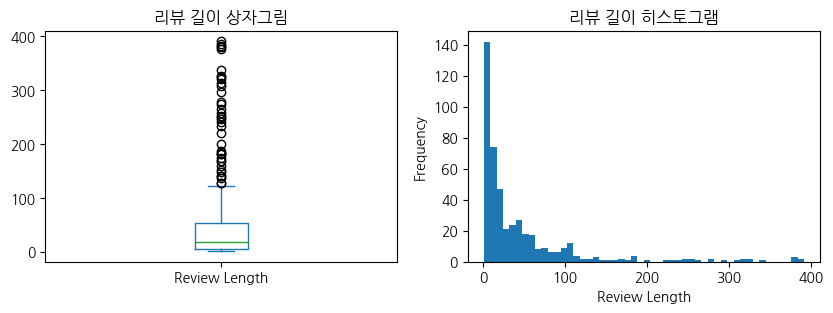

In [42]:
# Box Plot and Histogram
fig, ax = plt.subplots(1, 2, figsize=(10,3))
data["review_len"].plot.box(ax=ax[0])
data["review_len"].plot.hist(bins=50, ax=ax[1])

# title 설정
ax[0].set(title = "리뷰 길이 상자그림", xticklabels=["Review Length"])
ax[1].set(title = "리뷰 길이 히스토그램", xlabel="Review Length")

plt.show()

In [43]:
q1, q3 = data["review_len"].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - iqr * 1.5
upper = q3 + iqr * 1.5

print(f"Q1: {q1}, Q3: {q3}, IQR=Q3-Q1={iqr}")
print(f"LOWER: {lower}, UPPER: {upper}")

Q1: 6.0, Q3: 53.0, IQR=Q3-Q1=47.0
LOWER: -64.5, UPPER: 123.5


In [44]:
# 댓글의 다양성 확인 : 6부터 다양한 의견이 생기기 시작
data.loc[data["review_len"] == 6,"review"].value_counts()

review
너무맛있어요    1
굿 테이스팅    1
음식맛있네요    1
뷰가 멋져요    1
좋아하는 곳    1
잘먹고갑니다    1
잘쉬다갑니다    1
최고였습니다    1
Name: count, dtype: int64

In [45]:
lower = 6
upper = 123

data = data[(data["review_len"] >= 6) & (data["review_len"] <= 123)]
data.head(5)

,reviewer,review,additional_info,date,auth_method,weekday,review_len
0,shooooooo,종류도 알차게 많고 다 맛있어요,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-06-07,영수증,금요일,17
4,쥴리08,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024-05-23,결제내역,목요일,52
5,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-05-19,영수증,일요일,95
6,DEAN KIL,비싸지만 좋은곳,"예약 후 이용, 대기 시간 바로 입장, 친목, 지인·동료",2024-05-04,영수증,토요일,8
7,이진욱쨩,항상 친절하시고 음식도맛있네요,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-04-21,영수증,일요일,16


## ⭐️ 전처리 데이터 저장

In [46]:
# 분석에 이용되지 않는 열 제거 후 저장
preprocessing_data = data.drop(columns=["additional_info", "auth_method", "review_len"])
preprocessing_data.to_csv("./data/naver_review_preprocessing.csv", index=False, encoding="CP949")
preprocessing_data

,reviewer,review,date,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요,2024-06-07,금요일
4,쥴리08,커피랑 브런치크림파스타 먹었어요 오늘따라 파스타가 불어서나왔더라구요 역시 신라 커피...,2024-05-23,목요일
5,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024-05-19,일요일
6,DEAN KIL,비싸지만 좋은곳,2024-05-04,토요일
7,이진욱쨩,항상 친절하시고 음식도맛있네요,2024-04-21,일요일
...,...,...,...,...
498,baesa97,재료가 신선하고 서비스가 좋았어요,2019-11-21,목요일
499,Tim89,오붓한 시간을 보냈습니다 분위기와 편의 제공 등 모든 것이 만족스러웠습니다 다음 기...,2019-11-19,화요일
500,달콤한공기,예약석이라 그런지 자리도 너무 좋고 음식도 맛있었어요,2019-11-19,화요일
501,핵심이,맛있는 것도 너무 많고 서비스도 친절했어요 메뉴 종류가 많아서 입맛 까다로우신 부모...,2019-11-11,월요일


## 📋 결론

* 데이터 탐색
    - 정보가 너무 적어 사용하지 않음 `additional_info`, `auth_method`
    - 아이디, 방문 날짜, n번째 방문이 잘 맞지 않아 사용하지 않음. `n_visit` 

* 전처리 과정
    1. 중복 제거
    2. `date`열을 `date`와 `weekday`로 분리(ex. 2024년 6월 7일 -> 2024-06-07, 금요일)
    3. 필요없는 문자 제거(특수문자, 모음, 자음 등)
    4. `review` 결측치 제거
    5. `review` 교정
        1) 맞춤법 검사했으나 신조어의 의미가 달라져 쓰지 않음(❌ Pyhanspell)
        2) 두 개의 라이브러리를 비교하여 띄어쓰기 교정(Pykospacing, ✅ Soyspacing)
    6. `review` 길이를 통해 이상치 제거
        1) IQR를 기준으로 상한값 설정
        2) 하한값은 의미가 다양해지는 구간을 탐색하여 사용자가 직접 설정함
    